# Activation Functions!
- #### In this exercise, activation functions will be visualized to see how they transform the input.

In [151]:
import torch
import torch.nn
import matplotlib.pyplot as plt

In [152]:
# the data that will be input into each activation function!
x_inputs = torch.linspace(-3,3,101)

In [153]:
# pass in data and a string of activation function name
def run_activation_func(x, function_name):
    activation_function = getattr(torch, function_name)
    y = activation_function(x)
    return y

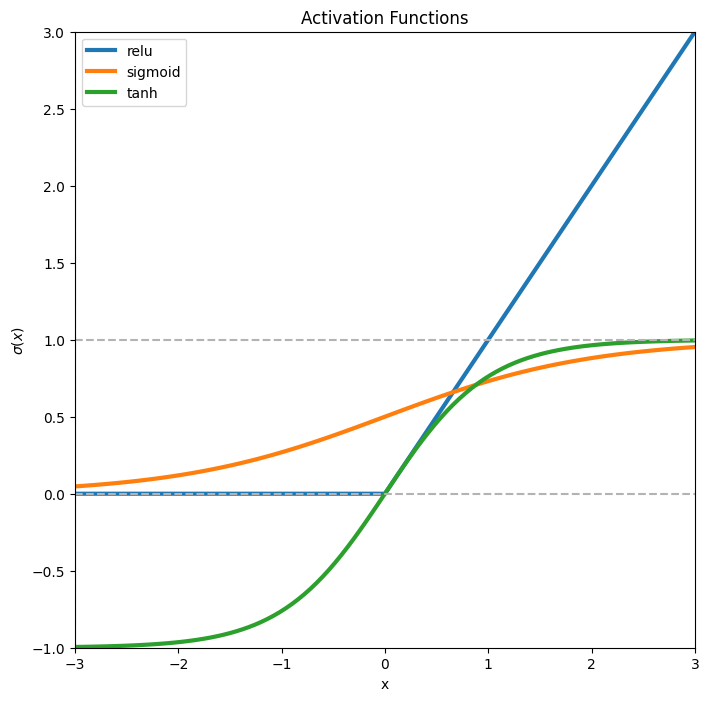

In [154]:
functions_list = ['relu', 'sigmoid', 'tanh']

fig = plt.figure(figsize=(8,8))

# plotting results of each function
for function_name in functions_list:
    plt.plot(x_inputs, run_activation_func(x_inputs, function_name), label=function_name, linewidth=3)

line_color = [0.7, 0.7, 0.7]
plt.plot(x_inputs[[0,-1]], [0,0], '--', color=line_color)
plt.plot(x_inputs[[0,-1]], [1,1], '--', color=line_color)
plt.plot(x_inputs[[0,0]], [-1,3], '--', color=line_color)

# make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Activation Functions')
plt.xlim(x_inputs[[0,-1]])
plt.ylim([-1,3])
plt.show()

#### Brief Notes:
- Looking at the sigmoid function here, it will push most input values to be around 0.5. This is why it can be problematic when using this activation function on hidden layers. Information from the activations will be lost, and it is more prone to vanishing gradients.
- In the range of [-1,1] for `tanh` and [0,1] for `relu` it is almost just a linear transformation of the inputs.

In [155]:
def get_NN_activation_function(x,function_name):
    try:
        # creates a class instance of the activation function
        active_func = getattr(torch.nn, function_name)()
    except AttributeError:
        raise ValueError(f"Activation function {function_name} does not exist.")

    y = active_func(x)
    return y

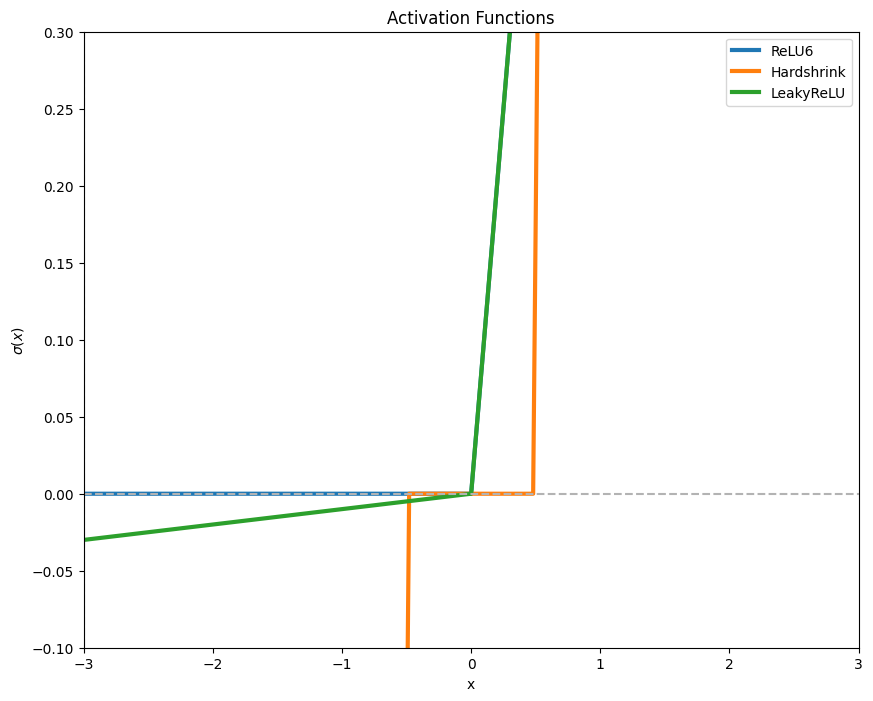

In [156]:
# the data that will be input into each activation function!
x_inputs = torch.linspace(-3,3,101)

# list of activation functions to run data through
activation_functions = ['ReLU6', 'Hardshrink', 'LeakyReLU']

fig = plt.figure(figsize=(10,8))

# plotting results of each function
for function_name in activation_functions:
    plt.plot(x_inputs, get_NN_activation_function(x_inputs, function_name), label=function_name, linewidth=3)


line_color = [0.7, 0.7, 0.7]
plt.plot(x_inputs[[0,-1]], [0,0], '--', color=line_color)
plt.plot(x_inputs[[0,-1]], [1,1], '--', color=line_color)
plt.plot(x_inputs[[0,0]], [-1,3], '--', color=line_color)
plt.plot(x_inputs[[0,0]], [6,6], '--', color=line_color)
# make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Activation Functions')
plt.xlim(x_inputs[[0,-1]])
plt.ylim([-.1,.3])
plt.show()

#### Important Notes about differences in syntax using functions from `torch` vs `torch.nn`

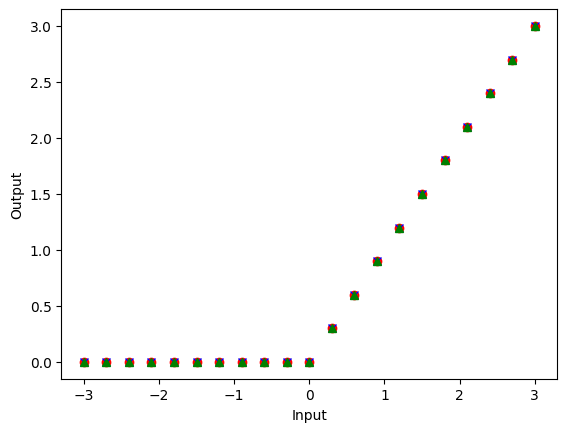

In [159]:
# These two calls do not return the same thing.
x = torch.linspace(-3,3,21)

# This returns the activation function itself, x values can immediately be input.
y_1 = torch.relu(x)

# This returns a class of the activation function. Be careful with the syntax. It MUST be instantiated with () BEFORE trying to input data.
activation_function = torch.nn.ReLU()
y_2 = activation_function(x)

# Which is the same as the following syntax:
y_3 = torch.nn.ReLU()(x)

plt.plot(x,y_1, 'ro', label='torch.relu')
plt.plot(x,y_2, 'bx', label='torch.nn.ReLU 1')
plt.plot(x,y_3, 'g^', label='torch.nn.ReLU 2')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()